-------
# **EXPLORATORY DATA ANALYSIS ON A DATASET**
-----

### OBJECTIVE:

### *conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure*

### LIBRARIES:

In [5]:
import pandas as pd                             #For data manipulation
import matplotlib.pyplot as plt                 #For plotting
import numpy as np                              #For numerical operations
import seaborn as sns                           #For advanced visualizations

In [6]:
import warnings                                 #To ignore warnings
warnings.filterwarnings("ignore")

### **TASKS :**

#### 1) PREPARATIONS AND DATA CLEANING :

In [9]:
df=pd.read_csv("Cardiotocographic.csv")        # Load dataset from CSV

In [10]:
df.head()                                      # Display the first 5 rows of the dataset

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [11]:
df.dtypes                                     # Show data types of each column

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [12]:
df.isnull().count()                         # Count missing values in each column

LB          2126
AC          2126
FM          2126
UC          2126
DL          2126
DS          2126
DP          2126
ASTV        2126
MSTV        2126
ALTV        2126
MLTV        2126
Width       2126
Tendency    2126
NSP         2126
dtype: int64

In [13]:
df.nunique()                               # Count unique values in each column

LB           153
AC          1067
FM           776
UC          1364
DL           822
DS           114
DP           264
ASTV         183
MSTV         165
ALTV         195
MLTV         351
Width        261
Tendency     111
NSP          111
dtype: int64

In [14]:
df_1 = df.drop_duplicates()                # Remove duplicate rows
df_1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [15]:
Q1 = df.quantile(0.25)                                                          # First quartile (25th percentile) 
Q3 = df.quantile(0.75)                                                          # Third quartile (75th percentile) 
IQR = Q3 - Q1                                                                   # Calculate interquartile range (IQR) 
df_outlr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)] # Filter out outliers based on IQR           
Q1,Q3,IQR,df_outlr.head()                                                      # Display IQR values and first few rows of the filtered dataset 

(LB          126.000000
 AC            0.000000
 FM            0.000000
 UC            0.001851
 DL            0.000000
 DS            0.000000
 DP            0.000000
 ASTV         32.000000
 MSTV          0.700000
 ALTV          0.000000
 MLTV          4.600000
 Width        37.000000
 Tendency      0.000000
 NSP           1.000000
 Name: 0.25, dtype: float64,
 LB          140.000000
 AC            0.005650
 FM            0.002567
 UC            0.006536
 DL            0.003289
 DS            0.000000
 DP            0.000000
 ASTV         61.000000
 MSTV          1.700000
 ALTV         11.000000
 MLTV         10.900000
 Width       100.000000
 Tendency      1.000000
 NSP           1.000000
 Name: 0.75, dtype: float64,
 LB          14.000000
 AC           0.005650
 FM           0.002567
 UC           0.004685
 DL           0.003289
 DS           0.000000
 DP           0.000000
 ASTV        29.000000
 MSTV         1.000000
 ALTV        11.000000
 MLTV         6.300000
 Width       63.0

#### 2) STATISTICAL SUMMARY : 

In [17]:
df.describe()                           # Summary statistics of numerical columns

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#### 3) DATA VISUALIZATION :

#### *(a)Histograms and Boxplots for Numerical Variables :*

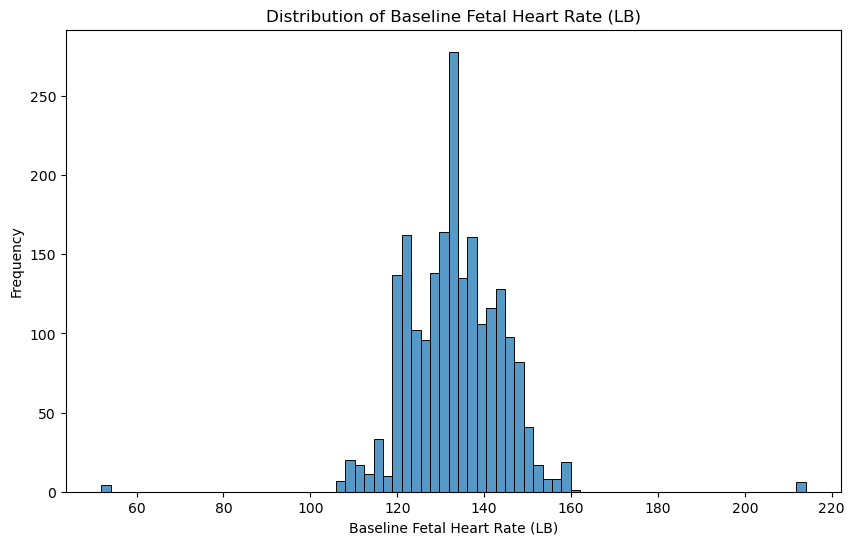

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LB'])                                           # Plot histogram of 'LB' (Baseline Fetal Heart Rate)
plt.title('Distribution of Baseline Fetal Heart Rate (LB)')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Frequency')
plt.show()

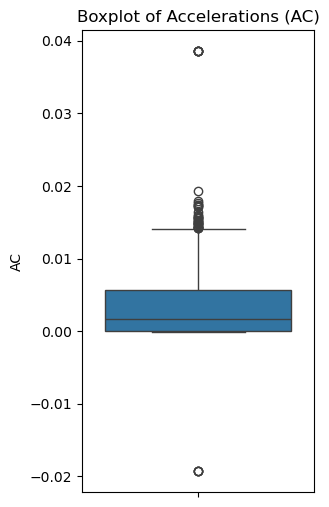

In [54]:
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['AC'])                        # Boxplot of 'AC' (Accelerations)
plt.title('Boxplot of Accelerations (AC)')
plt.show()

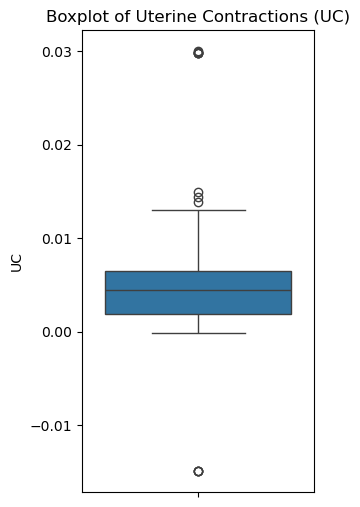

In [56]:
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['UC'])                             # Boxplot of 'UC' (Uterine Contractions)  
plt.title('Boxplot of Uterine Contractions (UC)')
plt.show()

#### *(b) Bar charts and pie charts are useful for displaying the frequency of categorical variables :*

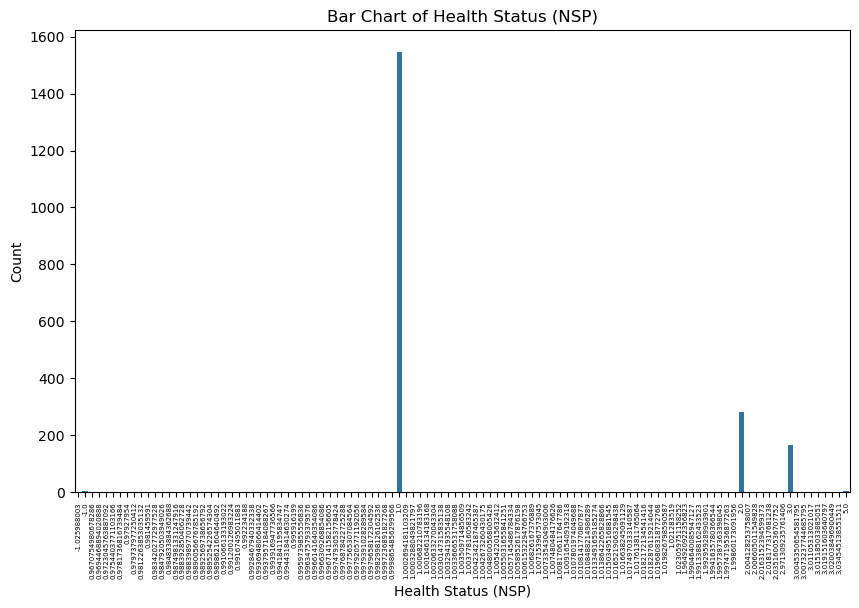

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NSP', data=df)                  # Countplot of 'NSP' (Health Status)
plt.title('Bar Chart of Health Status (NSP)')
plt.xlabel('Health Status (NSP)')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=5)              # Rotate x-axis labels for readability
plt.show()

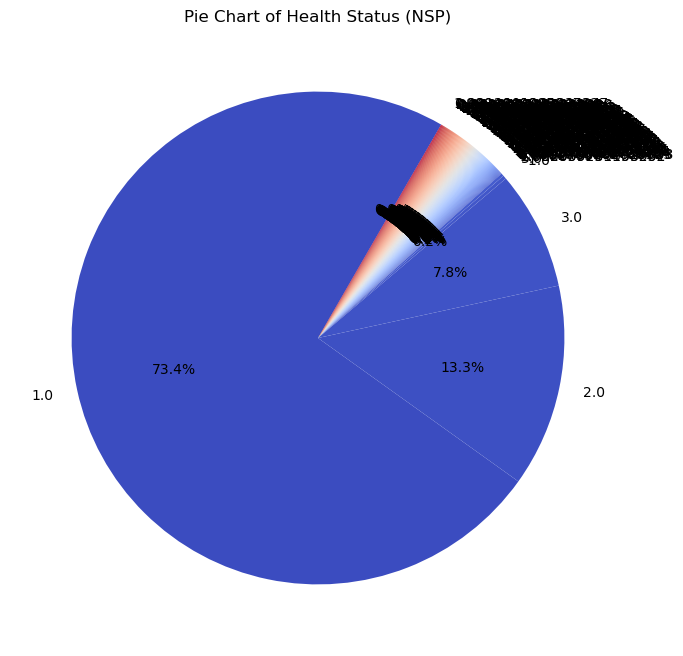

In [23]:
df['NSP'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=60, cmap='coolwarm')
plt.title('Pie Chart of Health Status (NSP)')
plt.ylabel('')
plt.show()

#### *(c) Scatter plots or correlation heatmaps to explore relationships between pairs of variables :*

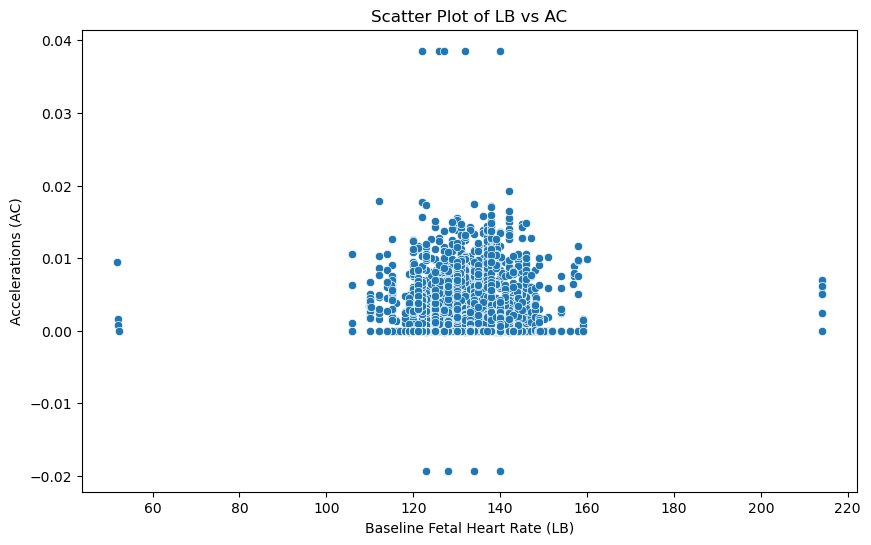

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='AC', data=df)       # Scatter plot of 'LB' vs 'AC'
plt.title('Scatter Plot of LB vs AC')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Accelerations (AC)')
plt.show()

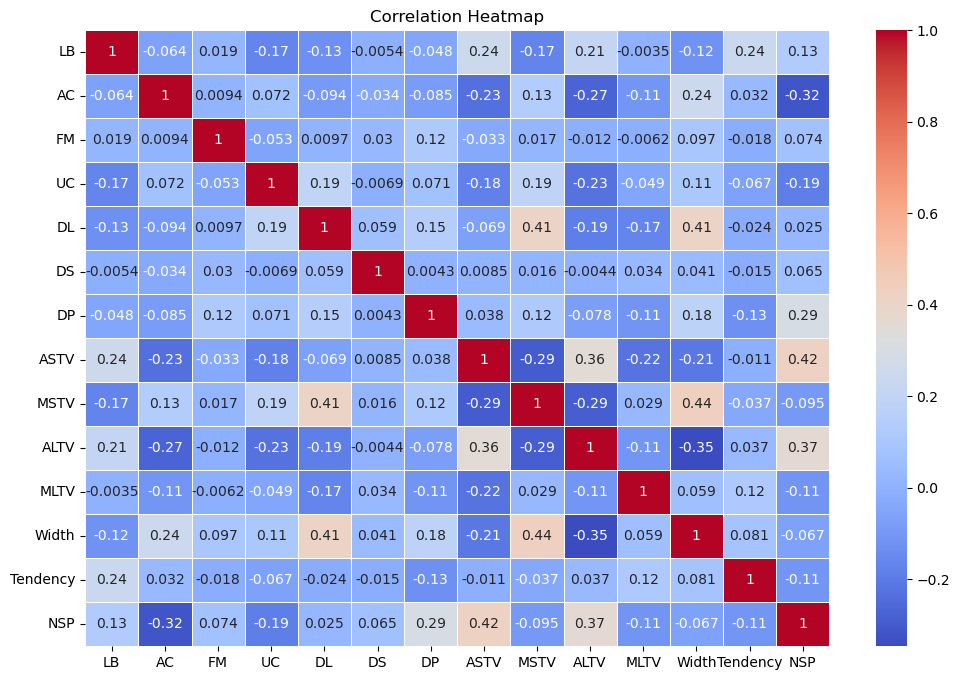

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()                                                  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### *(d) Advanced visualization techniques like pair plots, or violin plots for deeper insights :*

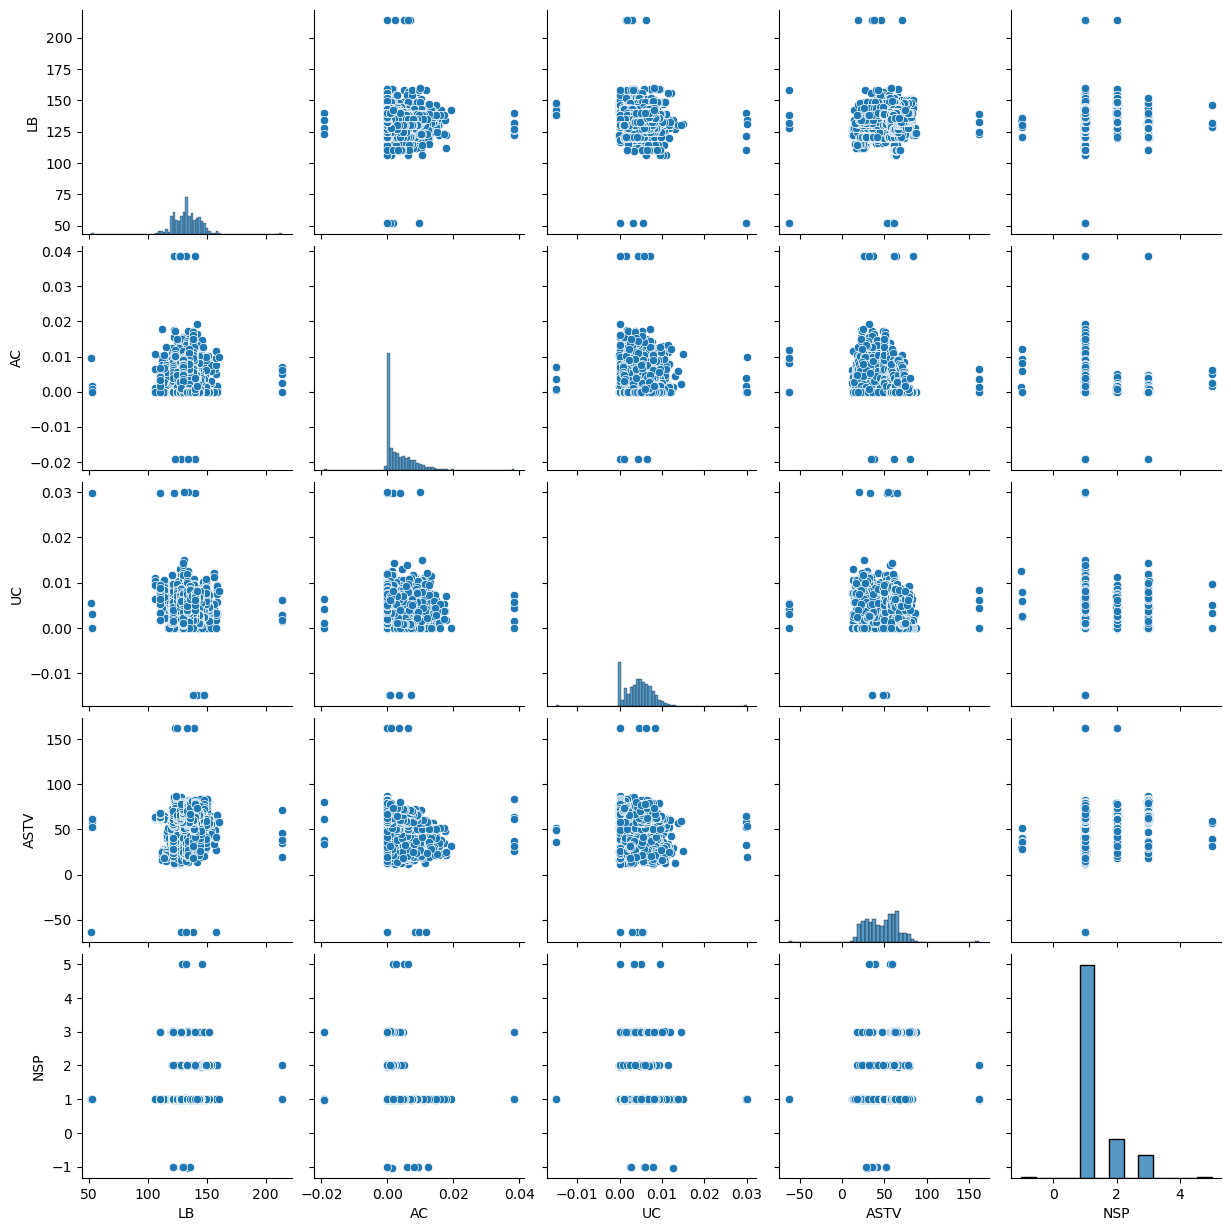

In [28]:
sns.pairplot(df[['LB', 'AC', 'UC', 'ASTV', 'NSP']])           # Pairplot for selected columns
plt.show() 

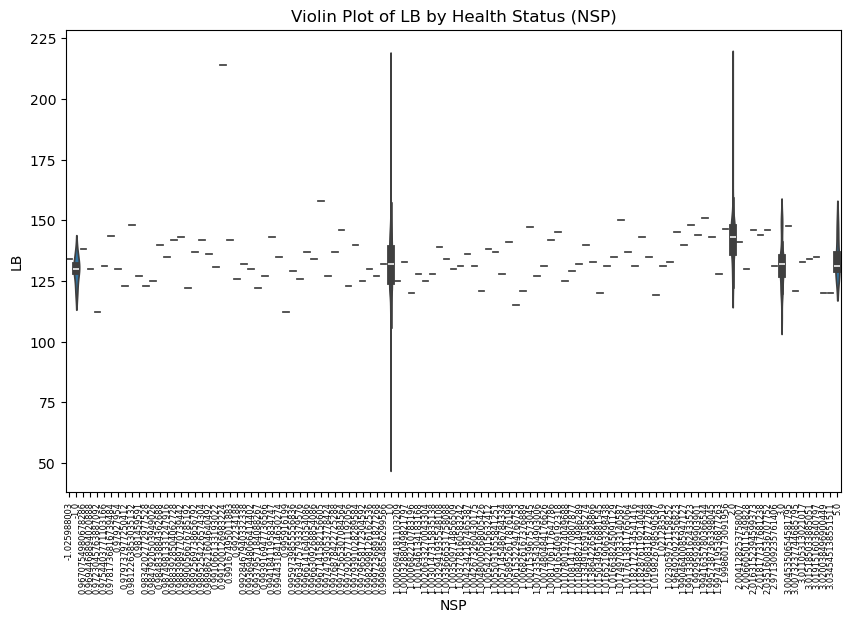

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='NSP', y='LB', data=df)               # Violin plot of 'LB' by 'NSP'
plt.title('Violin Plot of LB by Health Status (NSP)')
plt.xticks(rotation=90,fontsize=6)
plt.show()

#### 4) PATTERN RECOGNITION AND INSIGHTS :

- Strong correlation between accelerations (AC) and health status (NSP), but weak with heart rate (LB)
- No clear linear relationship between heart rate and accelerations; some data clusters indicate potential groupings
- Health statuses show varying heart rates, indicating diversity in physiological behavior within each group
- Most acceleration values are concentrated within a small range, with a few outliers
- Accelerations are key for prediction
- Outliers in acceleration values should be analyzed or removed to avoid skewed predictions

#### 5) CONCLUTION:

- More advanced techniques like clustering (K-means) could be used to explore the data’s underlying structure. Dimensionality reduction methods, like PCA (Principal Component Analysis), might also help in visualizing complex relationships

- The exploratory data analysis reveals that accelerations play a key role in determining health status, but heart rate has a weaker impact. Class imbalance and outliers will be critical challenges for further analysis and decision-making, especially in building reliable predictive models